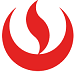

<h3 align="center">Inteligencia Artificial</h3>

## **Red Neuronal en Python con Keras y Tensorflow**

Crearemos una red neuronal artificial muy sencilla en Python con Keras y Tensorflow para comprender su uso. Implementaremos la compuerta XOR e intentaré comparar las ventajas del aprendizaje automático frente a la programación tradicional.

Las compuertas XOR
Para el ejemplo, utilizaremos las compuertas XOR. Si no las conoces o no las recuerdas, funcionan de la siguiente manera:

Tenemos dos entradas binarias (1 ó 0) y la salida será 1 sólo si una de las entradas es verdadera (1) y la otra falsa (0).

Es decir que de cuatro combinaciones posibles, sólo dos tienen salida 1 y las otras dos serán 0, como vemos aquí:

* XOR(0,0) = 0
* XOR(0,1) = 1
* XOR(1,0) = 1
* XOR(1,1) = 0

#### 1. Primero importamos las clases que utilizaremos:

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Utilizaremos numpy para el manejo de arrays. De Keras importamos el tipo de modelo Sequential y el tipo de capa Dense que es la “normal”.

Creamos los arrays de entrada y salida.

In [ ]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

Como se puede ver son las cuatro entradas posibles de la función XOR [0,0], [0,1], [1,0],[1,1] y sus cuatro salidas: 0, 1,1,0.

Ahora crearemos la arquitectura de nuestra red neuronal:

Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.

Agregamos dos capas Dense con “model.add()”. Realmente serán 3 capas, pues al poner input_dim=2 estamos definiendo la capa de entrada con 2 neuronas (para nuestras entradas de la función XOR) y la primer capa oculta (hidden) de 16 neuronas. Como función de activación utilizaremos “relu” que sabemos que da buenos resultados. Podría ser otra función, esto es un mero ejemplo, y según la implementación de la red que haremos, deberemos variar la cantidad de neuronas, capas y sus funciones de activación.

Y agregamos una capa con 1 neurona de salida y función de activación sigmoid.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Antes de de entrenar la red haremos unos ajustes de nuestro modelo:

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el “optimizador” de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

Ahora sí que entrenaremos la red:

In [ ]:
model.fit(training_data, target_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2620 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2615 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2610 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2605 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2600 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2595 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2591 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2586 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2581 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 

#### **Evaluamos y Predecimos**

Primero evaluamos el modelo

In [ ]:
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


1/1 [==============================] - 0s 132ms/step - loss: 0.0246 - binary_accuracy: 1.0000

binary_accuracy: 100.00%


Y vemos que tuvimos un 100% de precisión (recordemos lo trivial de este ejemplo).

Y hacemos las 4 predicciones posibles de XOR, pasando nuestras entradas:

In [ ]:
print (model.predict(training_data).round())

1/1 [==============================] - 0s 78ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


y vemos las salidas 0,1,1,0 que son las correctas.